pappus points:
2/5 3/5
9/4 5/2
21/34 14/17
   collinear:  True


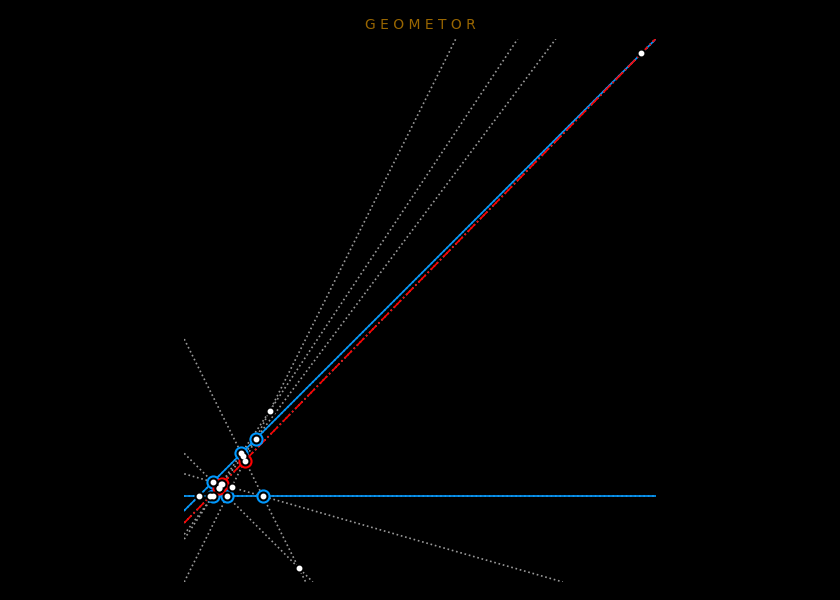

In [1]:
%run run.py
%matplotlib widget


A1 = point(0, 0)
add_point(A1)
A2 = point(1, 0)
add_point(A2)

line_a = line(A1, A2)
add_element(line_a)

# manually set for now
A3 = point(sp.Rational(7, 2), 0)
add_point(A3)


B1 = point(0, 1)
add_point(B1)
B2 = point(2, 3)
add_point(B2)

line_b = line(B1, B2)
add_element(line_b)

#TODO: set point by function
B3 = point(3, 4)
add_point(B3)

pappus_points = []

j1 = line(A1, B2)
j2 = line(A2, B1)
add_element(j1)
add_element(j2)
meet = j1.intersection(j2)
pappus_points.append(pts[pts.index(meet[0])])

j1 = line(A2, B3)
j2 = line(A3, B2)
add_element(j1)
add_element(j2)
meet = j1.intersection(j2)
pappus_points.append(pts[pts.index(meet[0])])

j1 = line(A1, B3)
j2 = line(A3, B1)
add_element(j1)
add_element(j2)
meet = j1.intersection(j2)
pappus_points.append(pts[pts.index(meet[0])])

pappus_line = line(pappus_points[0], pappus_points[1])
add_element(pappus_line)

limx = [0, 0]
limy = [0, 0]

for pt in pts:
    
    ptx = float(pt.x.evalf())
    pty = float(pt.y.evalf())
    # print(x, y)
    limx[0] = ptx if limx[0] > ptx else limx[0]
    limx[1] = ptx if limx[1] < ptx else limx[1]
    limy[0] = pty if limy[0] > pty else limy[0]
    limy[1] = pty if limy[1] < pty else limy[1]
    
limx[0] -= 1
limx[1] += 1
limy[0] -= 1
limy[1] += 1

bounds = set_bounds(limx, limy)

plt_init(limx, limy)

plot_elements(elements, bounds)
plot_line(line_a, bounds, color='#09F', linestyle='-')
plot_line(line_b, bounds, color='#09F', linestyle='-')
plot_line(pappus_line, bounds, color='r', linestyle='-.')

plot_points([A1, A2, A3], under_color='#09F', under_markersize=15, add_to_cursors=False)
plot_points([B1, B2, B3], under_color='#09F', under_markersize=15, add_to_cursors=False)
plot_points(pappus_points, under_color='r', under_markersize=15, add_to_cursors=False)
plot_points(pts)

print(f'pappus points:')
for pt in pappus_points:
    print(pt.x, pt.y)
    
print('   collinear: ', sp.Point.is_collinear(*pappus_points))



In [2]:
x = 10
print(f'{x: >{x}}')

        10


In [3]:
print('points: ', len(pts))
for pt in pts:
    print(f'{str(pt.x): >8} {str(pt.y): >8}')

points:  18
       0        0
       1        0
     7/2        0
       0        1
       2        3
      -1        0
       3        4
     2/5      3/5
       4        6
       6       -5
     9/4      5/2
     3/7      4/7
   21/10     14/5
   14/25    21/25
   21/16      5/8
   21/34    14/17
   -7/38        0
      30       31


In [4]:
def spread(l1, l2):
    '''calculate the spread '''
    a1, a2, a3 = l1.coefficients
    b1, b2, b3 = l2.coefficients

    spread = ((a1*b2 - a2*b1) ** 2) / ( (a1 ** 2 + b1 ** 2) * (a2 ** 2 + b2 ** 2) )
    return spread

In [5]:
sp1 = spread(line_a, pappus_line)
if not math.isnan(sp1):
    print(sp1)


400/1769


In [6]:
pappus_line.coefficients

In [7]:
line_b.equation().as_expr().subs(x, 5)

In [8]:
eq1 = sp.Eq(line_b.equation().expand(), 0)
# eq1 = sp.Expr(line_b.equation())
eq1 - sp.Expr(line_b.equation().as_expr())

TypeError: unsupported operand type(s) for -: 'Equality' and 'Expr'

In [ ]:
# eq2 = sp.Eq(-x + y - 1, 0)
eq1 = x - 5
eq2 = -x + y - 1
# eq2 = line_b.equation()
# eq2
sp.solve([eq1, eq2])

In [ ]:
l1 = line(A1, A2)
l1.equation()

In [ ]:
sp.solve([eq1, eq2], y)

In [ ]:
sp.solve(line_b.equation(), eq)

In [ ]:
line_b.intersection(sp.Line(sp.Eq(x + 0 * y - 5)))

In [ ]:
sp.Eq(x, 5)